In [1]:
import pandas as pd
import numpy as np
import math
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

### Homework 3.1

In [2]:
hw31 = pd.read_csv('homework_3.1.csv', index_col=0)
hw31

,time,value1,value2,value3
0,0,1.764052,1.883151,-0.369182
1,1,0.420157,-1.327759,-0.219379
2,2,1.018738,-1.230485,1.139660
3,3,2.300893,1.029397,0.715264
4,4,1.947558,-1.093123,0.720132
...,...,...,...,...
95,95,5.856573,3.628454,5.936891
96,96,5.230500,4.611791,4.937725
97,97,7.075870,4.703504,5.462954
98,98,5.486912,6.083236,4.520551


In [3]:
hw31['time_centered'] = hw31['time'] - 50
hw31

,time,value1,value2,value3,time_centered
0,0,1.764052,1.883151,-0.369182,-50
1,1,0.420157,-1.327759,-0.219379,-49
2,2,1.018738,-1.230485,1.139660,-48
3,3,2.300893,1.029397,0.715264,-47
4,4,1.947558,-1.093123,0.720132,-46
...,...,...,...,...,...
95,95,5.856573,3.628454,5.936891,45
96,96,5.230500,4.611791,4.937725,46
97,97,7.075870,4.703504,5.462954,47
98,98,5.486912,6.083236,4.520551,48


In [4]:
post_event = []
for time in hw31['time']:
    if time >= 50:
        post_event.append(1)
    else:
        post_event.append(0)

hw31['post_event'] = post_event
hw31

,time,value1,value2,value3,time_centered,post_event
0,0,1.764052,1.883151,-0.369182,-50,0
1,1,0.420157,-1.327759,-0.219379,-49,0
2,2,1.018738,-1.230485,1.139660,-48,0
3,3,2.300893,1.029397,0.715264,-47,0
4,4,1.947558,-1.093123,0.720132,-46,0
...,...,...,...,...,...,...
95,95,5.856573,3.628454,5.936891,45,1
96,96,5.230500,4.611791,4.937725,46,1
97,97,7.075870,4.703504,5.462954,47,1
98,98,5.486912,6.083236,4.520551,48,1


In [5]:
hw31['interaction'] = hw31['time_centered'] * hw31['post_event']
hw31

,time,value1,value2,value3,time_centered,post_event,interaction
0,0,1.764052,1.883151,-0.369182,-50,0,0
1,1,0.420157,-1.327759,-0.219379,-49,0,0
2,2,1.018738,-1.230485,1.139660,-48,0,0
3,3,2.300893,1.029397,0.715264,-47,0,0
4,4,1.947558,-1.093123,0.720132,-46,0,0
...,...,...,...,...,...,...,...
95,95,5.856573,3.628454,5.936891,45,1,45
96,96,5.230500,4.611791,4.937725,46,1,46
97,97,7.075870,4.703504,5.462954,47,1,47
98,98,5.486912,6.083236,4.520551,48,1,48


In [6]:
model1 = sm.OLS(hw31['value1'], sm.add_constant(hw31[['time_centered', 'post_event']]))
results1 = model1.fit()
results1.params

const            1.748828
time_centered    0.043854
post_event       0.850813
dtype: float64

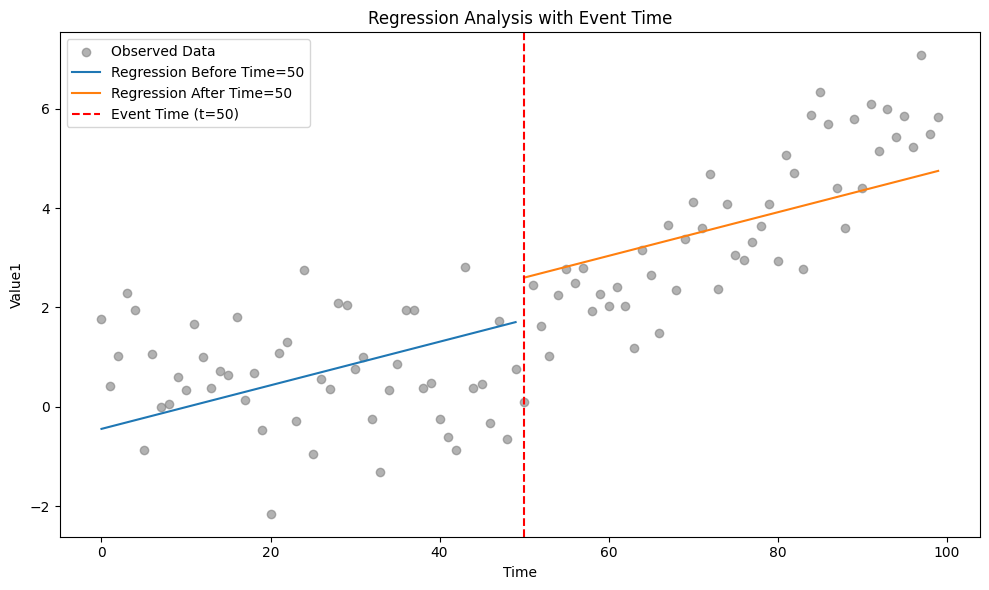

In [7]:
hw31['predicted'] = results1.predict(sm.add_constant(hw31[['time_centered', 'post_event']]))
pre_event = hw31[hw31['post_event'] == 0]
post_event = hw31[hw31['post_event'] == 1]

plt.figure(figsize=(10, 6))
plt.scatter(hw31['time'], hw31['value1'], color='gray', alpha=0.6, label = 'Observed Data')
plt.plot(pre_event['time'], pre_event['predicted'], label='Regression Before Time=50')
plt.plot(post_event['time'], post_event['predicted'], label='Regression After Time=50')
plt.axvline(50, color='red', linestyle='--', label='Event Time (t=50)')
plt.xlabel('Time')
plt.ylabel('Value1')
plt.title('Regression Analysis with Event Time')
plt.legend()
plt.tight_layout()
plt.show()

In [8]:
results1.bse

const            0.277148
time_centered    0.008486
post_event       0.489889
dtype: float64

In [9]:
model2 = sm.OLS(hw31['value2'], sm.add_constant(hw31[['time_centered', 'post_event']]))
results2 = model2.fit()
results2.params

const            1.480022
time_centered    0.028764
post_event       0.682746
dtype: float64

In [10]:
results2.bse

const            0.241580
time_centered    0.007397
post_event       0.427019
dtype: float64

In [11]:
model3 = sm.OLS(hw31['value3'], sm.add_constant(hw31[['time_centered', 'post_event']]))
results3 = model3.fit()
results3.params

const            1.290278
time_centered    0.036275
post_event       1.767254
dtype: float64

In [12]:
results3.bse

const            0.229477
time_centered    0.007026
post_event       0.405625
dtype: float64

In [13]:
model1 = sm.OLS(hw31['value1'], sm.add_constant(hw31[['time_centered', 'post_event', 'interaction']]))
results1 = model1.fit()
results1.params, results1.bse

(const            0.405939
 time_centered   -0.008809
 post_event       0.903475
 interaction      0.105325
 dtype: float64,
 const            0.274441
 time_centered    0.009367
 post_event       0.382425
 interaction      0.013246
 dtype: float64)

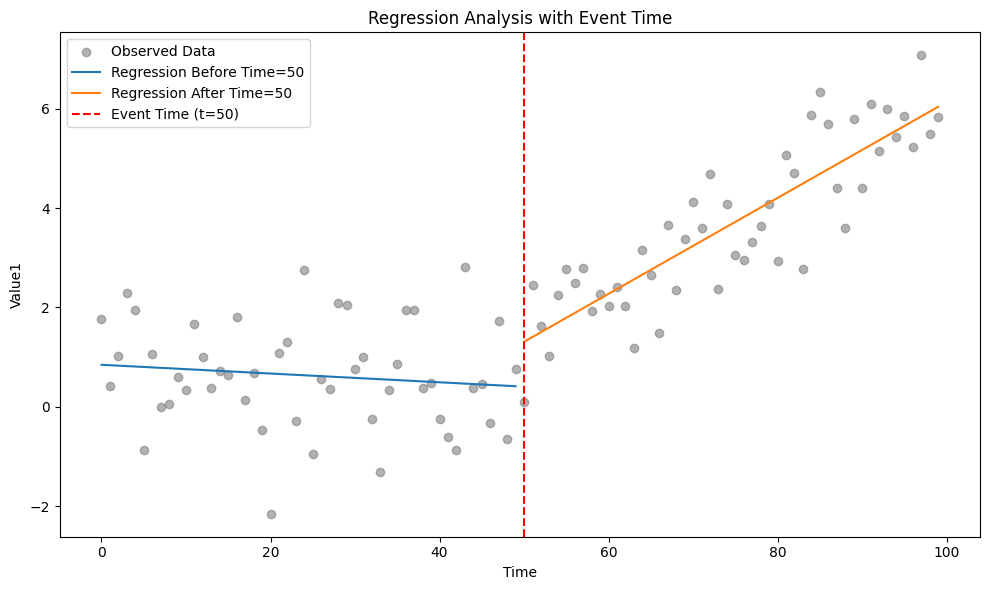

In [14]:
hw31['predicted'] = results1.predict(sm.add_constant(hw31[['time_centered', 'post_event', 'interaction']]))
pre_event = hw31[hw31['post_event'] == 0]
post_event = hw31[hw31['post_event'] == 1]

plt.figure(figsize=(10, 6))
plt.scatter(hw31['time'], hw31['value1'], color='gray', alpha=0.6, label = 'Observed Data')
plt.plot(pre_event['time'], pre_event['predicted'], label='Regression Before Time=50')
plt.plot(post_event['time'], post_event['predicted'], label='Regression After Time=50')
plt.axvline(50, color='red', linestyle='--', label='Event Time (t=50)')
plt.xlabel('Time')
plt.ylabel('Value1')
plt.title('Regression Analysis with Event Time')
plt.legend()
plt.tight_layout()
plt.show()

In [15]:
model2 = sm.OLS(hw31['value2'], sm.add_constant(hw31[['time_centered', 'post_event', 'interaction']]))
results2 = model2.fit()
results2.params, results2.bse

(const            1.009275
 time_centered    0.010304
 post_event       0.701206
 interaction      0.036921
 dtype: float64,
 const            0.298025
 time_centered    0.010171
 post_event       0.415289
 interaction      0.014385
 dtype: float64)

In [16]:
model3 = sm.OLS(hw31['value3'], sm.add_constant(hw31[['time_centered', 'post_event', 'interaction']]))
results3 = model3.fit()
results3.params, results3.bse

(const            0.643916
 time_centered    0.010928
 post_event       1.792602
 interaction      0.050695
 dtype: float64,
 const            0.272305
 time_centered    0.009294
 post_event       0.379449
 interaction      0.013143
 dtype: float64)

### Homework 3.2

In [17]:
hw32a = pd.read_csv('homework_3.2.a.csv', index_col=0)
hw32b = pd.read_csv('homework_3.2.b.csv', index_col=0)
hw32a

,group1,time1,outcome1
0,0,0,0.882026
1,0,1,1.600079
2,0,0,0.489369
3,0,1,2.520447
4,0,0,0.933779
...,...,...,...
995,1,1,4.306435
996,1,0,1.900801
997,1,1,4.147096
998,1,0,1.426195


In [18]:
hw32b

,group2,time2,outcome2
0,0,0,0.667155
1,0,1,2.470969
2,0,0,-0.506778
3,0,1,1.525657
4,0,0,0.273664
...,...,...,...
995,1,1,4.637301
996,1,0,3.681828
997,1,1,4.710121
998,1,0,0.629718


In [19]:
hw32a['interaction'] = hw32a['group1'] * hw32a['time1']
hw32b['interaction'] = hw32b['group2'] * hw32b['time2']
hw32a

,group1,time1,outcome1,interaction
0,0,0,0.882026,0
1,0,1,1.600079,0
2,0,0,0.489369,0
3,0,1,2.520447,0
4,0,0,0.933779,0
...,...,...,...,...
995,1,1,4.306435,1
996,1,0,1.900801,0
997,1,1,4.147096,1
998,1,0,1.426195,0


In [20]:
hw32b

,group2,time2,outcome2,interaction
0,0,0,0.667155,0
1,0,1,2.470969,0
2,0,0,-0.506778,0
3,0,1,1.525657,0
4,0,0,0.273664,0
...,...,...,...,...
995,1,1,4.637301,1
996,1,0,3.681828,0
997,1,1,4.710121,1
998,1,0,0.629718,0


In [21]:
model1 = sm.OLS(hw32a['outcome1'], sm.add_constant(hw32a[['group1', 'time1', 'interaction']]))
results1 = model1.fit()
results1.params, results1.bse, results1.tvalues

(const         -0.025849
 group1         1.986278
 time1          1.427213
 interaction    0.685847
 dtype: float64,
 const          0.031199
 group1         0.044210
 time1          0.044166
 interaction    0.062522
 dtype: float64,
 const          -0.828535
 group1         44.928019
 time1          32.314876
 interaction    10.969611
 dtype: float64)

In [22]:
model2 = sm.OLS(hw32b['outcome2'], sm.add_constant(hw32b[['group2', 'time2', 'interaction']]))
results2 = model2.fit()
results2.params, results2.bse, results2.tvalues

(const          0.102107
 group2         1.847719
 time2          1.265513
 interaction    1.349859
 dtype: float64,
 const          0.073377
 group2         0.103978
 time2          0.103874
 interaction    0.147047
 dtype: float64,
 const           1.391551
 group2         17.770217
 time2          12.183163
 interaction     9.179774
 dtype: float64)